<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2022/blob/main/notebooks/es6/MetodiAI_Fis2021_Es6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 6: clustering non-supervisionato con k-means e GMM, confronto con PCA e con classificazione supervisonata basata su k-NN. 

**Task:** Scopo: familiarizzare con l'implementazione di algoritmi di clustering usando il package scikit-learn

**Dataset:** World Happiness Report 2016

Il World Happiness Report è una survey di riferimento sullo stato della felicità nel mondo.

Gli happiness score e la relativa classifica utilizza i dati del sondaggo Gallup World Poll. Il punteggio è basato sulle risposte alle domande poste nel sondaggio ad abitanti i vari paesi analizzati. 

Le colonne che seguono l'happiness score nella tabella fornita stimano 
la misura in cui ciascuno dei sei fattori - *produzione economica, sostegno sociale, aspettativa di vita, libertà, assenza di corruzione e generosità* - contribuisce a rendere le valutazioni della qualità della vita più alte in ciascun paese rispetto a *Dystopia*, un paese ipotetico che ha valori pari alle medie nazionali più basse del mondo per ciascuno dei sei fattori. Non hanno alcun impatto sul punteggio totale (*happiness score*) riportato per ogni paese, ma spiegano perché alcuni paesi si collocano più in alto di altri.

In [1]:
!rm -rf 2016.csv
!wget http://giagu.web.cern.ch/giagu/CERN/2016.csv

--2022-04-15 07:45:22--  http://giagu.web.cern.ch/giagu/CERN/2016.csv
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17132 (17K) [text/csv]
Saving to: ‘2016.csv’

2016.csv            100%[===================>]  16.73K  --.-KB/s    in 0.1s    

2022-04-15 07:45:24 (142 KB/s) - ‘2016.csv’ saved [17132/17132]



**Parte 1:**

Loading, analisi e pre-processamento del dataset:

1.   leggere con pandas il dataset
2.   analisi statistica descrittiva del dataset 
3.   utilizzzando come features: 
```
['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
```
implementare un'analisi PCA a 2 componenti del campione, graficando in due dimensioni gli elementi del dataset opportunamente colorati in base al valore del *Happiness Score* categorizzato (con un certo livello di arbitrarietà) come:
```
felice: HS = 0:     ['Happiness Score']>=6.5$
neutro: HS = 1: 6.5>['Happiness Score']>4.5$
triste  HS = 2:     ['Happiness Score']<=4.5$
```


In [ ]:
#code

In [17]:
#@title Soluzione 1.1
import numpy as np
import pandas as pd

data = pd.read_csv('2016.csv')
display(data)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [18]:
#@title Soluzione 1.2 
features = list(data.columns[6:13])
hs = [data.columns[3]]

print(features)
print(hs)

display(data[features].describe())
print()
display(data[features].corr())

['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
['Happiness Score']


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Economy (GDP per Capita),1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia Residual,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


In [19]:
#@title Soluzione 1.3A
#aggiungiamo label di happines score 

# tristi (HS label == 2)
data['HS'] = ((data['Happiness Score']<=4.5)*2)  #2 per le righe che soddisfano la condizione, 0 altrimenti
# neutri (HS label == 1)
data['HS'] = data['HS'] + (((data['Happiness Score']>4.5) & (data['Happiness Score']<6.5))*1) #+1 per le righe che soddisfano la condizione
# il resto sono i paesi felici (HS lbel == 0)

#normalizzazione delle feature (sottraiamo la media di ogni colonna) e dividiamo per la stdv di ogni colonna

data_norm = data.copy()

data_mean = data_norm[features].mean()
data_std  = data_norm[features].std()
data_norm[features] = (data_norm[features]-data_mean)/data_std 

print ('Media osservabili dopo normalizzazione')
print(data_norm[features].mean())
print ('Deviazione standard osservabili dopo normalizzazione')
print(data_norm[features].std())

Media osservabili dopo normalizzazione
Economy (GDP per Capita)         4.893467e-16
Family                          -1.637756e-15
Health (Life Expectancy)         1.251653e-15
Freedom                          5.176326e-16
Trust (Government Corruption)   -3.040738e-17
Generosity                      -2.011837e-16
Dystopia Residual               -4.886396e-16
dtype: float64
Deviazione standard osservabili dopo normalizzazione
Economy (GDP per Capita)         1.0
Family                           1.0
Health (Life Expectancy)         1.0
Freedom                          1.0
Trust (Government Corruption)    1.0
Generosity                       1.0
Dystopia Residual                1.0
dtype: float64


Explained variation per principal component: [0.41749694 0.20266625]


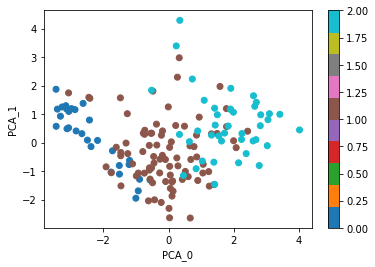

In [20]:
#@title Soluzione 1.3B
#PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_norm[features])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#NOTA: l'explained variation indica quanto ciascuna componente contribusice alla varianza totale del campione

import matplotlib.pyplot as plt
plt.scatter(pca_result[:,0], pca_result[:,1], c=data_norm['HS'], cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
_ = plt.colorbar()

**Parte 2:**

**Clustering k-means**

1.   implementare un clustering k-means con $k=[2,10]$ e trovare i valori di k più compatibili con il campione con il metodo dell'elbow
2.   provare ad usare il metodo *Silhouette*:
```
La silouette S misura quanto è simile un punto ai punti del suo cluster (coesione A), confrontato con quanto è dissimile ai punti degli altri cluster (separazione B):
S = (B-A)/max(A,B)
S raggiunge un massimo globale per il k ottimale ...
usare: sklearn.metrics.silhouette_score
```
quale dei due metodi funziona meglio?

3.   colorare i punti nello spazio 2D PCA con i risultati del clustering k-means ottenuti con il k ottimale e confrontare qualitativamente con le label dei tre gruppi basati sull'HappinessScore
4.   addestrare infine un k-means con k=3 clusters e calcolare l'accuracy tra cluster predetto e gruppo basato sull'HappinesScore 

> NOTA: l'indice di gruppo di un algoritmo di clustering in generae non corrisponde all'indice di classe (non è un algoritmo di classificazione e l'indice di cluster è solo un contatore interno di associazione di ogni evento del campione ad uno dei cluster ricostruiti dall'algoritmo).
Per calcolare una pseudo-accuracy bisogna quindi o mappare gli indici tra loro (facile se sono pochi cluster) o usare un algoritmo diverso tipo [adjusted_rand_score](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) di scikit-learn.

**Clustering GMM**

5.   implementare un clustering GMM con 3 componenti, usando l'implementazione di scikit-learn: *from sklearn.mixture import GaussianMixture*
6.   colorare i punti nello spazio 2D PCA con i risultati del clustering GMM e confrontare con le label dei tre gruppi basati sull'HappinessScore, e plottare le regioni con il 68% di probabilità di appartenere a ciascuna componente gaussiana (suggerimento: produrre una grid sullo spazio PCA-0, PCA-1, applicare la trasformazione inversa PCA ai punti di tale grid, e poi applicare la predizione della probabilità della GMM *predict_proba* ai diversi punti)


In [ ]:
#code

Valore ottimale di k =  4


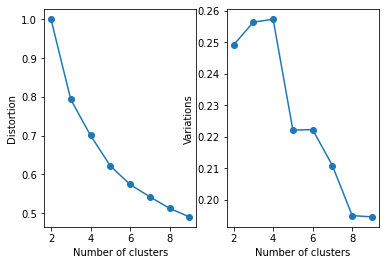

In [21]:
#@title Soluzione 2.1-2
#Clustering using k-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# calcoliamo il best k usando la distorsione e la shilouette
k_max=10
distortions = []
variations = []
for i in range(2, k_max):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=20, max_iter=600,
        tol=1e-04, random_state=0
    )
    km.fit(data_norm[features].values)
    labels = km.labels_
    
    distortions.append(km.inertia_)
    variations.append(silhouette_score(data_norm[features].values, labels, metric = 'euclidean'))


# plot
plt.subplot(1,2,1)
plt.plot(range(2, k_max), [x/distortions[0] for x in distortions], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.subplot(1,2,2)
plt.plot(range(2, k_max), variations, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Variations')

valori = range(2, k_max)
k_optim = valori[variations.index(max(variations))]
print('Valore ottimale di k = ', k_optim)

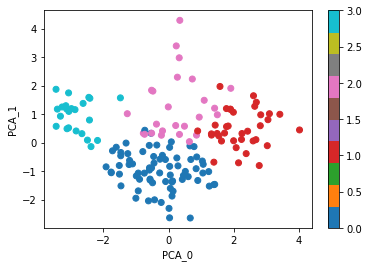

In [22]:
#@title Soluzione 2.3
#plot
km = KMeans(
    n_clusters=k_optim, init='k-means++',
    n_init=20, max_iter=600, 
    tol=1e-04, random_state=0
)
y_km = km.fit(data_norm[features].values)
y_pred = y_km.labels_.astype(int)

plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.colorbar()

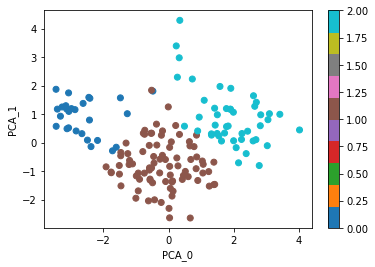

In [23]:
#@title Soluzione 2.4A
#plot
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=20, max_iter=600, 
    tol=1e-04, random_state=0
)
y_km = km.fit(data_norm[features].values)
y_pred = y_km.labels_.astype(int)

plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.colorbar()

In [24]:
#@title Soluzione 2.4B
from sklearn.metrics import accuracy_score, adjusted_rand_score

#NOTA: l'indice di gruppo di k-means non è detto che corrisponda all'indice di classe
# per calcolare una pseudo-accuracy bisogna o mappare gli indici tra loro (facile se sono pochi cluster) 
# oppure usare adjusted_rand_score
# (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

# dai plot delle PCA si osserva che nel caso specifico  che gli indici di cluster 0,1,2 di k-means corrispondono a quelli 
# delle label reali (è un caso)

mappa = np.array([0,1,2]) #la mappa è 1 a 1

y_true = data_norm['HS'].values

accuracy_kmeans_3 = accuracy_score(data_norm['HS'].values, mappa[y_pred])
print('k-maens (k=3) pseudo-accuracy from manual mapping: ', accuracy_kmeans_3)

accuracy_kmeans_3_rs = adjusted_rand_score(data_norm['HS'].values, y_pred)
print('k-maens (k=3) adjusted rand-score: ', accuracy_kmeans_3_rs)

k-maens (k=3) pseudo-accuracy from manual mapping:  0.7707006369426752
k-maens (k=3) adjusted rand-score:  0.3929517499920392


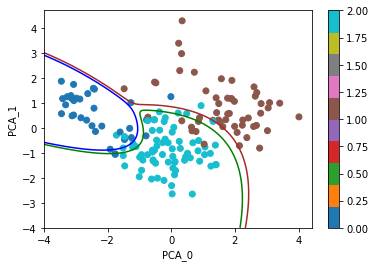

In [25]:
#@title Soluzione 2.5/2.6
#Clustering using Gaussian Mixture

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(data_norm[features].values)

y_pred = gmm.predict(data_norm[features].values) 

#procedura: grid nello spazio PCA e poi trasformazione PCA inversa per 
#tornare nello spazio originale al quale applicare la predizione della gmm
h = .02

xx, yy = np.meshgrid(np.arange(-4., 4., h), 
                     np.arange(-4., 4., h))

zz = np.c_[xx.ravel(), yy.ravel()]

zz_orig = pca.inverse_transform(zz)
prob = gmm.predict_proba(zz_orig)

prob = prob.reshape((xx.shape[0],xx.shape[1],3))

plt.contour(xx, yy, prob[:,:,0], levels=[0.68], colors='blue')
plt.contour(xx, yy, prob[:,:,1], levels=[0.68], colors='brown')
plt.contour(xx, yy, prob[:,:,2], levels=[0.68], colors='green')

plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.colorbar()

**Parte 3:**

Confronto con un classificatore k-NN

1.   classificare gli eventi del campione con un classificatore supervisionato k-NN usando come label i tre gruppi felice, neutro, triste (0,1,2) dell'HappinesScore (scegliere in modo opportuno il numero di primi vicini per il k-NN utilizzando una k-fold x-validation)
2.   confrontare con l'accuracy otteuta usando come predizione della classe l'indice di cluster di k-means fatta al punto 2.4B

In [ ]:
#code 

k =  1  average accuracy =  0.8208333333333332
k =  2  average accuracy =  0.7808333333333334
k =  3  average accuracy =  0.8600000000000001
k =  4  average accuracy =  0.8333333333333333
k =  5  average accuracy =  0.8724999999999999
k =  6  average accuracy =  0.8324999999999999
k =  7  average accuracy =  0.9108333333333334
k =  8  average accuracy =  0.8591666666666666
k =  9  average accuracy =  0.8858333333333335
k =  10  average accuracy =  0.8466666666666667
k =  11  average accuracy =  0.8341666666666667
k =  12  average accuracy =  0.8474999999999999
k =  13  average accuracy =  0.8099999999999999
k =  14  average accuracy =  0.8099999999999999
k =  15  average accuracy =  0.7841666666666667
k =  16  average accuracy =  0.7716666666666667
k =  17  average accuracy =  0.7449999999999999
k =  18  average accuracy =  0.7716666666666667
k =  19  average accuracy =  0.745
Best test accuracy 0.9108333333333334  for k =  7


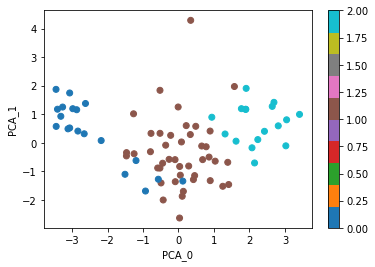

In [28]:
#@title Soluzione 3
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
#aggiungo le variabili PCA  al dataframe per comodità

data_norm['PCA_0'] = pca_result[:,0]
data_norm['PCA_1'] = pca_result[:,1]

#randomizzo gli eventi
rnd_raws = np.random.permutation(len(data_norm))
data_norm_shuffled = data_norm.iloc[rnd_raws] 
data_norm_shuffled.reset_index(drop=True)

#divido il campione in 2 campioni 50% train/vali e 30% test
train = data_norm_shuffled[:int(0.5*len(data_norm_shuffled.index))].copy()
test = data_norm_shuffled[int(0.5*len(data_norm_shuffled.index)):].copy()

train.reset_index(drop=True)
test.reset_index(drop=True)

X = train[features].values
y = train['HS'].values

acc = []
krange = range(1,20)
for n_primivicini in krange:
    model = neighbors.KNeighborsClassifier(n_primivicini)
    scores = cross_val_score(model, X, y, cv=5)
    acc.append(np.mean(scores))
    print('k = ', n_primivicini, ' average accuracy = ', np.mean(scores))

best_k = krange[acc.index(max(acc))]
print('Best test accuracy', max(acc), ' for k = ', best_k)

model = neighbors.KNeighborsClassifier(best_k)
model.fit(X,y)
y_pred=model.predict(test[features].values)

plt.scatter(test['PCA_0'], test['PCA_1'], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
_ = plt.colorbar()


**Per casa:**

testare i vari algoritmi di clustering in funzione dei loro parametri

indentificare quali tra le feature del World Happines report dataset forniscono il maggior contributo all'Happines Rank: i.e. cosa rende un paese più felice?